## Transposition / Enharmonic Variant

Both the displayed and the payback pitch can be set independently from the note/chord pitch. 

* **Displayed Pitch**: The displayed pitch, being a notation, can be set via `.addSymbol(symbols.NotatedPitch(...))` or `.addSymbol(symbols.Transpose(...))`. 
* **Playback Pitch**: This can be set via `.setPlay(transpose=...)`


In [1]:
from maelzel.core import *

5D♯:1♩
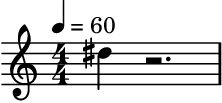

In [2]:
n = Note("5Eb", 1)
n

5D♯ (5Eb):1♩:symbols=[NotatedPitch(pitch=5Eb)]
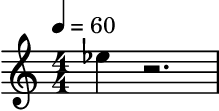

In [3]:
n = Note("5D#", 1).addSymbol(symbols.NotatedPitch("5Eb"))
n

There is a shortcut for this: append a '!' sign to the notename as suffix

5E♭:1♩
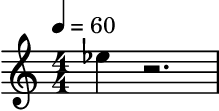

In [4]:
n = Note("5Eb!", 1)
n

Or set `fixed=True`

5E♭:1♩
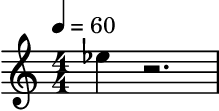

In [5]:
n = Note("5Eb", fixed=True)
n

Events can customize the notated pitch in any way, not only as an enharmonic variant. **NB**: this does not change the playback pitch or the pitch value of the note itself

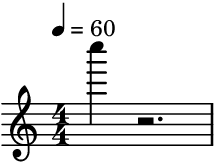

The actual pitch of this note is 5C


using libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 512 sample-frame blocks
reading 4096-byte blks of shorts from adc:ALC257 Analog: (RAW)
writing 1024 sample blks of 64-bit floats to dac:ALC257 Analog:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(‖ preset:.piano=401.0002 start=.253 dur=1 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=72 p21=0.515178 p22=1 p23=72 …)

In [6]:
n = Note("5C", 1)
n.addSymbol(symbols.NotatedPitch('7C'))
n.show()
print(f"The actual pitch of this note is {n.name}")
n.play(instr='.piano')

## Transposition

Notation transposition is used to shift the notated pitches by a given interval. This can be applied to a note, chord, a Chain or a complete Voice

Voice([4C:1♩, 4D:2♩, 4D♭:1/2♩, 4F♯:1/2♩])
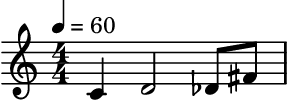

In [7]:
from maelzel.core import *
voice = Voice(r'''
    4C:1; 4D:2; 4Db!:0.5; 4F#!:0.5
''')
voice

Transpositions follows fixed notes

Score(3 voices)
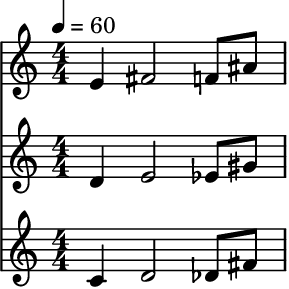

In [9]:
voice2 = voice.copy()
voice2.addSymbol(symbols.Transpose(2))
voice3 = voice.copy()
voice3.addSymbol(symbols.Transpose(4))
Score([voice3, voice2, voice])


Here, as a comparison, the same notes without fixed spellings

Score(3 voices)
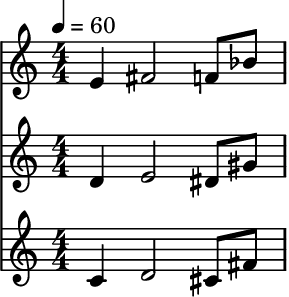

In [11]:
voice1 = Voice(r'''
    4C:1; 4D:2; 4Db:0.5; 4F#:0.5
''')
voice2 = voice1.copy()
voice2.addSymbol(symbols.Transpose(2))
voice3 = voice1.copy()
voice3.addSymbol(symbols.Transpose(4))
sco = Score([voice3, voice2, voice1])
sco


In [12]:
sco.write("~/tmp/3voices.ly")

Microtones are also transposed correctly

Score(3 voices)
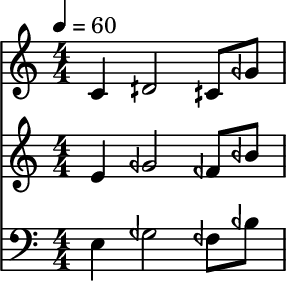

In [10]:
voice = Voice(r'''
    4C:1; 4D+:2; 4Db-:0.5; 4F#+:0.5
''')
voice2 = voice.copy()
voice2.addSymbol(symbols.Transpose(2))
voice3 = voice.copy()
voice3.addSymbol(symbols.Transpose(-4))
Score([voice, voice2, voice3])


## Playback transposition

The opposite: playback transposition only. Here the playback pitch is modified without changing the pitch value of the note or the displayed pitch

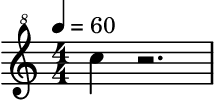

OfflineRenderer(sr=44100)
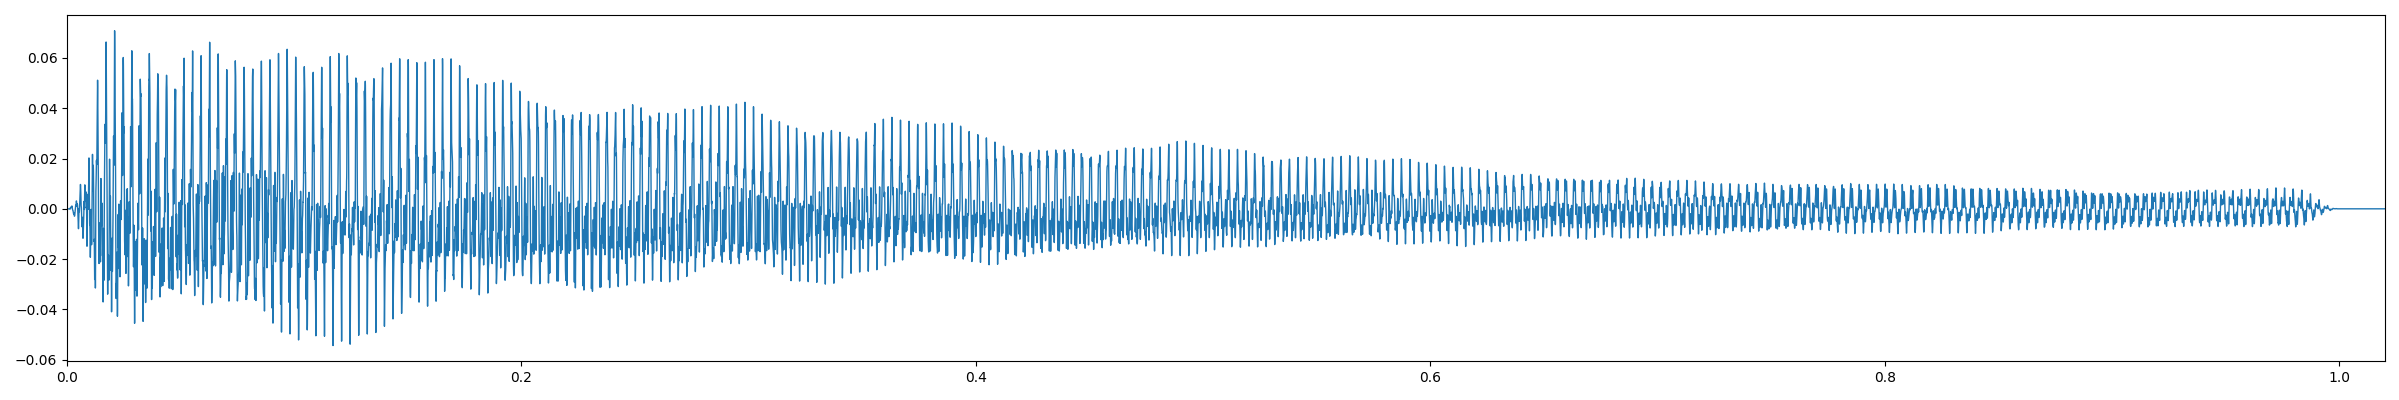

In [17]:
n = Note("6C", 1).setPlay(transpose=-24)
n.show()
n.rec("snd/transp.flac", nchnls=1, instr='.piano')

In [14]:
pset = defSoundfont("/home/em/Lib/snd/sf2/Violin--violin-non-vib.sf2", name="violin", reverb=True)

In [15]:
pset

Preset: violin  
    routing=False, properties={'sfpath': '/home/em/Lib/snd/sf2/Violin--violin-non-vib.sf2', 'ampDivisor': 0, 
'sfbank': 0, 'sfpresetnum': 1, 'sfpreset': 'violin-non-vib', 'reverbInstr': '.zitarev'}
  init: i__SfTable__ sfloadonce "/home/em/Lib/snd/sf2/Violin--violin-non-vib.sf2"

  |ktransp=0.0, ipitchlag=0.1, ivel=-1, kwet=0.0|
  ipresetidx sfpresetindex "/home/em/Lib/snd/sf2/Violin--violin-non-vib.sf2", 0, 1
  iamp0_ = p(idataidx_ + 2)
  inote0_ = round(p(idataidx_ + 1))
  kpitch2 = lag:k(kpitch + ktransp, ipitchlag)
  iampdiv_ = 16384
  if ivel < 0 then
      ivel _linexp dbamp(iamp0_), 2.6, -72, 0, 1, 127
  endif
  aout1, aout2 sfplay ivel, inote0_, kamp/iampdiv_, mtof:k(kpitch2), ipresetidx, 1
  kpos = kpos == -1 ? 0.5 : kpos
  a_outL, a_outR = panstereo(aout1, aout2, kpos)
  if kwet > 0 then
      chnmix a_outL * kwet, ".zitarev.1"
      chnmix a_outR * kwet, ".zitarev.2"
      kdry = 1 - kwet
      a_outL *= kdry
      a_outR *= kdry
  endif
  outch ichan, a_outL, ichan + 1, a_outR

  epilogue:
    turnoffWhenSilent aout1

OfflineRenderer(sr=44100)
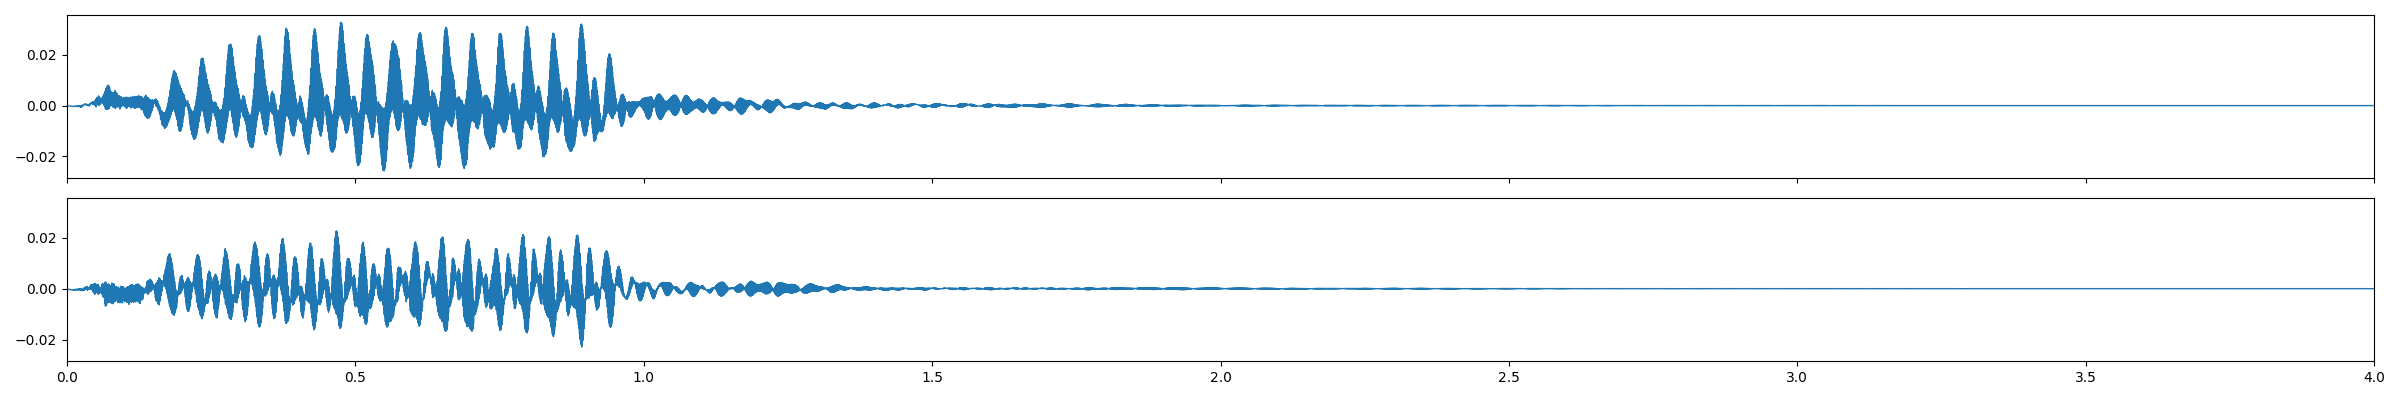

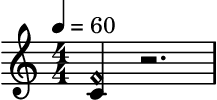

In [22]:
n = Note("4C").addSymbol(symbols.Harmonic('artificial', 5)).setPlay(transpose=24)
n.rec(instr='violin', fade=(0, 0.1), kwet=0.8, extratime=3).show()
n.show()


Chain([4C♯:1♩, 4D:1/2♩, 4D♯:1♩])
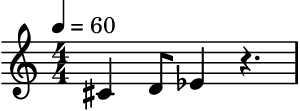

In [23]:
ch = Chain([
    "4C#:1",
    "4D:0.5",
    "4Eb:1"
])
ch

Chain([4F♯:1♩, 4G:1/2♩, 4G♯:1♩])
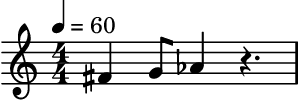

In [24]:
ch.transpose(5)

Chain([4C♯:1♩, 4D:1/2♩, 4D♯:1♩])
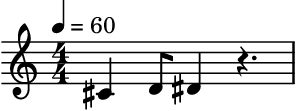

In [25]:
ch = Chain([
    "4C#:1",
    "4D:0.5",
    "4D#!:1"
])
ch

Chain([4F♯:1♩, 4G:1/2♩, 4G♯:1♩])
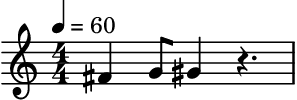

In [26]:
ch.transpose(5)

‹4D,4F,4G,4B:1♩›
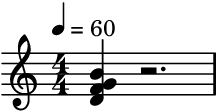

In [27]:
ch = Chord("4D,4F,4G,4B")
ch

‹4D,4F,4G,4B:1♩›
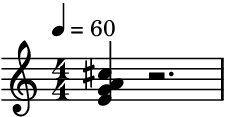

In [28]:
ch2 = ch.copy()
ch2.addSymbol(symbols.Transpose("+2M"))

‹4D,4F,4G#,4B:1♩›
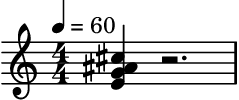

In [31]:
ch =  Chord("4D,4F,4G#!,4B")
ch.addSymbol(symbols.Transpose(2))
ch

Voice([‹4D,4F,4G#,4B:1♩›])
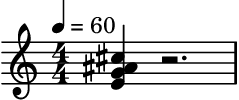

In [2]:
from maelzel.core import *
ch =  Chord("4D,4F,4G#!,4B")
# ch.addSymbol(symbols.Transpose(2))
v = Voice([ch])
v.addSymbol(symbols.Transpose(2))
v